In [82]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt

from utils.data_generation import generate_vectors, generate_scalars
from benchmark_functions.sphere import sphere_func

# Generating data

In [83]:
np.random.seed(1000)

In [84]:
# data configuration
input_dimention = 1
domain = [-5, 5]

data_set_size = 1_000

In [85]:
data_set_vectors = np.linspace(domain[0], domain[1], data_set_size)
data_set_scalars = data_set_vectors

# data_set_vectors = generate_vectors(input_dimention, domain, data_set_size)
# data_set_scalars = generate_scalars(data_set_vectors, sphere_func)


# Add noise

### Gaussian

In [90]:
# noise configuration
noise_mean = 0
noise_std_deviation = 1.5

# generate noise
noise = np.random.normal(noise_mean, noise_std_deviation, data_set_size)
noisy_scalars = data_set_scalars + noise

### Salt and pepper

In [97]:
# noise configuration
noise_percentage = .1
noise_size = int(data_set_size * noise_percentage)

# generate noise
noise_indices = np.random.choice(data_set_size, noise_size)
noise = np.random.choice([data_set_scalars.min(), data_set_scalars.max()], noise_size)

noisy_scalars = data_set_scalars.copy()
for idx in range(noise_size):
    indice = noise_indices[idx]
    noisy_scalars[indice] = noise[idx]

### Quantization

In [95]:
# noise configuration
noise_percentage = .1
noise_size = int(data_set_size * noise_percentage)

# generate noise
noise_indices = np.random.choice(data_set_size, noise_size)
noise = np.random.choice([data_set_scalars.min(), data_set_scalars.max()], noise_size)

noisy_scalars = data_set_scalars.copy()
noisy_scalars[noise_indices] = np.rint(noisy_scalars[noise_indices])

# Plot

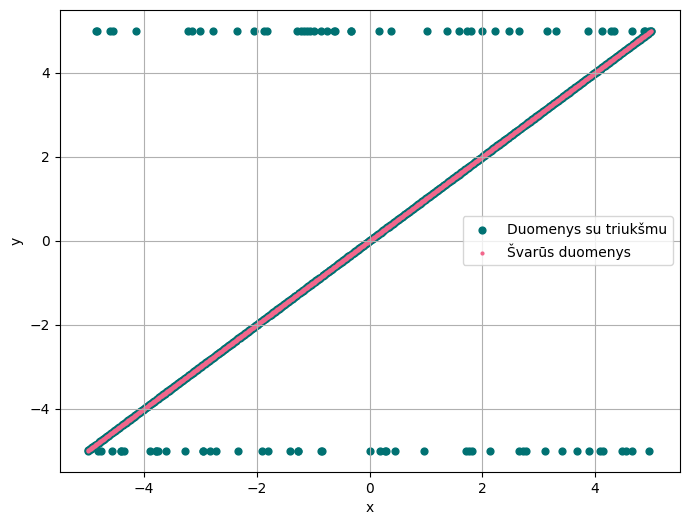

In [98]:
plt.figure(figsize = (8, 6))

plt.scatter(
    data_set_vectors, 
    noisy_scalars, 
    s = 24, 
    c = "#007172",
    label = rf"Duomenys su triukšmu"
)

plt.scatter(
    data_set_vectors, 
    data_set_scalars, 
    c = "#F2668B",
    s = 4,
    label = "Švarūs duomenys"
)

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid()

plt.show()